## Data Science Principles with Applications on Educational Data, Spring 2023 
## HW3
### Due date: 06/12/2023

### Student ID: 111598066
### Name: 許哲維

### Homework Description
This assignment is to practice creating chart using the tool such as MatPlotLib with model accuracy and know how to make a simple machine learning model. Below is the code for training a model to classify hand-writting numbers. With MNIST dataset and your model, this homework should be done according to the following **requirements**:

>**<font color=green size=5> Requirement 1  </font>**
#### Display part of MNIST dataset
**<font color=darkgreen size=3> Sample </font>**

![HW3sample_DisplayDataSet.png](HW3sample_DisplayDataSet.png)

>**<font color=green size=5> Requirement 2 </font>** 

#### Show the frequency of each number

**<font color=darkgreen size=3> Sample </font>**

![HW3sample_DisplayFrequency.png](HW3sample_DisplayFrequency.png)

>**<font color=green size=5> Requirement 3 </font>** 

#### Traning 2 models with different penalty and display its accuracy

**<font color=darkgreen size=3> Sample </font>**

![HW3sample_DisplayAccuracy.png](HW3sample_DisplayAccuracy.png)

**<font color=darkred size=2> Please do not forget, in each chart, to have the topic on the top and label the x-axis and y-axis.</font>**

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [2]:
#If you can not do fetch_openml, download data from https://www.openml.org/d/554 and open it by your self
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)

In [3]:
# Splitting the data for training and validation
# You could modify if you need
train_samples = 5000
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

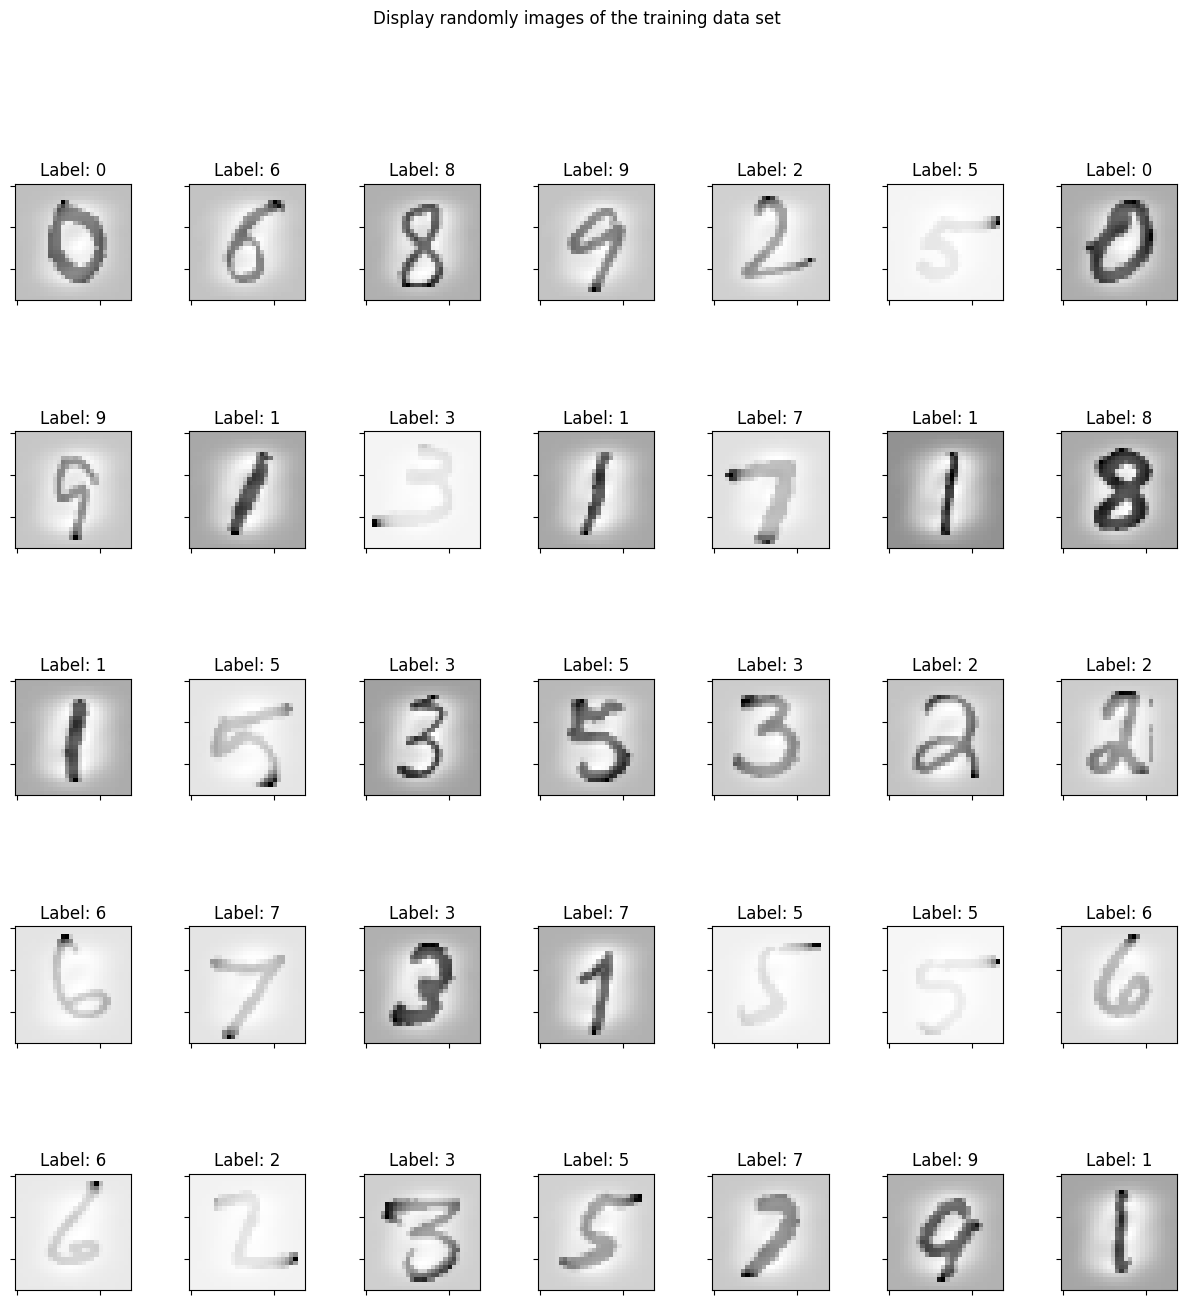

In [4]:
def displayData(X,y): #Take 35 data to make a 5x7 chart
    X = X.astype('float32')/255
    # set up array
    fig, ax = plt.subplots(nrows=5, ncols=7, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    
    for i in range(5):
        for j in range(7):
            ind = np.random.randint(X.shape[0])
            ax[i,j].set_title("Label: {}".format(y[ind]))
            ax[i,j].imshow(X[ind].reshape(28,28), cmap='binary') # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5) 
    

displayData(X_train,y_train)  #You could modify it if you need

'\nfig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))\nax.hist(y_test,bins=[0,1,2,3,4,5,6,7,8,9,10], edgecolor="b", histtype="bar",align=\'left\')\nax.set_title(\'Histogram: Testing data set\')\nax.set(xlabel=\'Number\', ylabel=\'Frequency\')\nax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9])\nax.xaxis.set_ticklabels([\'0\',\'1\',\'2\',\'3\',\'4\',\'5\',\'6\',\'7\',\'8\',\'9\'])\nax.axhline(y=(y_test.size/10), label="average frequency",linestyle=\'dashed\', color=\'r\')\nax.legend()\n'

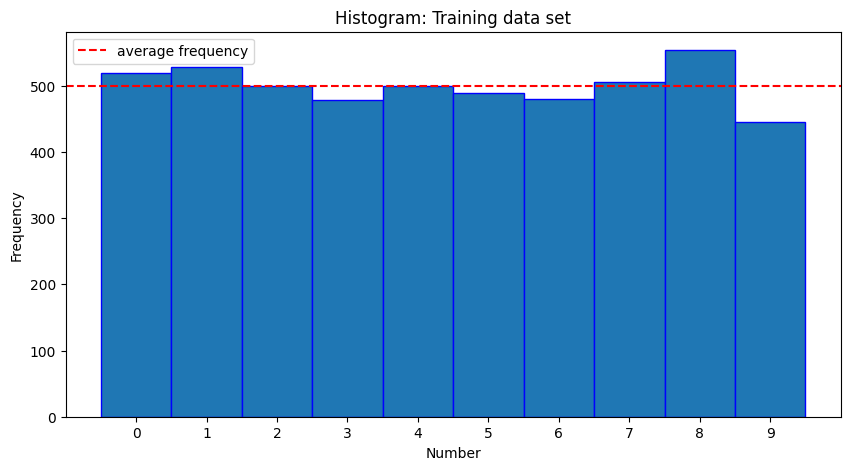

In [5]:
#Show frequency of each number
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.hist(y_train,bins=[0,1,2,3,4,5,6,7,8,9,10], edgecolor="b", histtype="bar",align='left')
ax.set_title('Histogram: Training data set')
ax.set(xlabel='Number', ylabel='Frequency')
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9])
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])
ax.axhline(y=(y_train.size/10), label="average frequency",linestyle='dashed', color='r')
ax.legend()

'''
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.hist(y_test,bins=[0,1,2,3,4,5,6,7,8,9,10], edgecolor="b", histtype="bar",align='left')
ax.set_title('Histogram: Testing data set')
ax.set(xlabel='Number', ylabel='Frequency')
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9])
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])
ax.axhline(y=(y_test.size/10), label="average frequency",linestyle='dashed', color='r')
ax.legend()
'''

In [20]:
score_of_1st_model = []
for i in range(10):
    clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
    clf.fit(X_train, y_train)
    score_of_1st_model.append(clf.score(X_test, y_test))

score_of_2nd_model = []
for i in range(10):
    clf = LogisticRegression(C=250.0 / train_samples, penalty="l1", solver="saga", tol=0.001) #To win the 1st model, try using other parameters .
    #After setting parameters, fit your model and record the score.
    clf.fit(X_train, y_train)
    score_of_2nd_model.append(clf.score(X_test, y_test))
    
#Show accuracy of 2 models
print(score_of_1st_model)
print(score_of_2nd_model)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[0.8322, 0.8323, 0.8319, 0.8328, 0.8315, 0.8313, 0.8317, 0.8327, 0.8319, 0.8325]
[0.8855, 0.8855, 0.8853, 0.8857, 0.8853, 0.8854, 0.8853, 0.8856, 0.8855, 0.8855]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


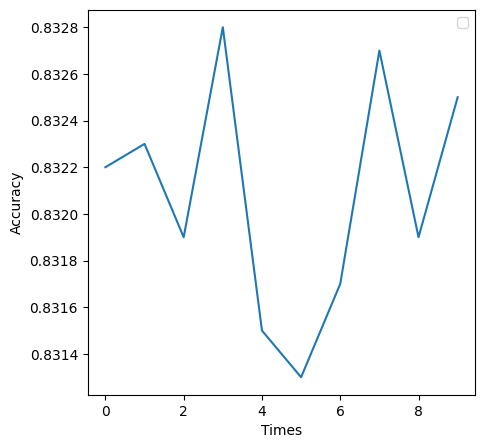

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.plot(score_of_1st_model)
ax.set_xlabel('Times')
ax.set_ylabel('Accuracy')    
ax.legend()
plt.show()

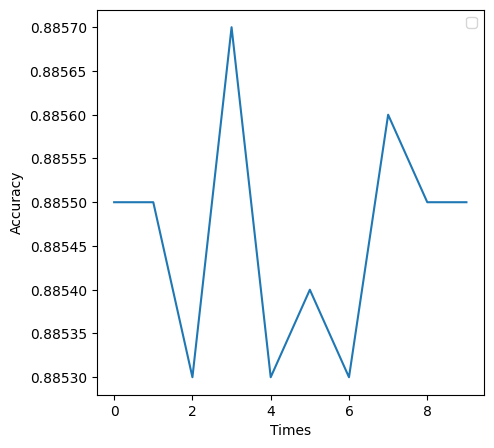

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.plot(score_of_2nd_model)
ax.set_xlabel('Times')
ax.set_ylabel('Accuracy')    
ax.legend()
plt.show()